In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os , shutil

##### Image Lenghts refer to `preparation.ipynb` in this directory

Test folder contains images 190 images with fire and 190 images images with No fire.

Train folder contains images 610 images with fire and 610 images images with No fire.

Validation folder contains images 150 images with fire and 150 images images with No fire. images

In [2]:
test_folder = os.path.join('data' , 'test')
train_folder = os.path.join('data', 'train')
val_folder = os.path.join('data','validation')


In [3]:
import time
import scipy
from PIL import Image
from scipy import ndimage
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

np.random.seed(123)

In [4]:
train_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
    train_folder,
    target_size=(64,64),
    batch_size=1220
    )

test_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
    test_folder,
    target_size=(64,64),
    batch_size=380
)

val_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
    val_folder,
    target_size=(64,64),
    batch_size=300
)

Found 1220 images belonging to 2 classes.
Found 380 images belonging to 2 classes.
Found 300 images belonging to 2 classes.


In [5]:
train_images , train_labels = next(train_generator)
test_images , test_labels = next(test_generator)
val_images , val_labels = next(val_generator)

In [6]:
print(train_images.shape , train_labels.shape)
print(test_images.shape , test_labels.shape)
print(val_images.shape , val_labels.shape)

(1220, 64, 64, 3) (1220, 2)
(380, 64, 64, 3) (380, 2)
(300, 64, 64, 3) (300, 2)


In [7]:
train_img = train_images.reshape(train_images.shape[0], -1)
test_img = test_images.reshape(test_images.shape[0], -1)
val_img = val_images.reshape(val_images.shape[0], -1)

print(f'train shape {train_img.shape} \ntest shape {test_img.shape} \nval shape {val_img.shape}')

train shape (1220, 12288) 
test shape (380, 12288) 
val shape (300, 12288)


In [8]:
train_y = np.reshape(train_labels[:,0] , (1220,1))
test_y = np.reshape(test_labels[:,0] , (380,1))
val_y = np.reshape(val_labels[:,0] , (300,1))

print(f'train shape {train_y.shape} \ntest shape {test_y.shape} \nval shape {val_y.shape}')

train shape (1220, 1) 
test shape (380, 1) 
val shape (300, 1)


In [9]:
from tensorflow.keras import layers , models
from tensorflow.keras.regularizers import l1,l2
from tensorflow.keras.optimizers import Adam

In [10]:
input_shape = (12288,)
model = models.Sequential()

model.add(layers.Dense(150,activation='relu',input_shape=input_shape))
model.add(layers.Dense(100,activation='relu'))
model.add(layers.Dense(50,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))


In [11]:
model.compile(optimizer=Adam(learning_rate=0.001),metrics=['acc'],loss='binary_crossentropy')
results = model.fit(
                    train_img,
                    train_y,
                    epochs=150,
                    batch_size=256,
                    validation_data=(val_img,val_y)
            )
print('\n\n')
acc1 = model.evaluate(train_img,train_y)
acc2 = model.evaluate(test_img,test_y)
print((f'Train: {acc1} || Test: {acc2}'))

Epoch 1/150
5/5 [==============================] - 0s 62ms/step - loss: 1.0001 - acc: 0.5951 - val_loss: 0.3644 - val_acc: 0.8067
Epoch 2/150
5/5 [==============================] - 0s 28ms/step - loss: 0.3863 - acc: 0.8131 - val_loss: 0.2924 - val_acc: 0.8533
Epoch 3/150
5/5 [==============================] - 0s 20ms/step - loss: 0.3129 - acc: 0.8689 - val_loss: 0.2947 - val_acc: 0.8900
Epoch 4/150
5/5 [==============================] - 0s 24ms/step - loss: 0.2469 - acc: 0.9016 - val_loss: 0.2634 - val_acc: 0.8933
Epoch 5/150
5/5 [==============================] - 0s 25ms/step - loss: 0.2276 - acc: 0.9066 - val_loss: 0.2522 - val_acc: 0.9000
Epoch 6/150
5/5 [==============================] - 0s 24ms/step - loss: 0.2109 - acc: 0.9156 - val_loss: 0.2495 - val_acc: 0.9100
Epoch 7/150
5/5 [==============================] - 0s 25ms/step - loss: 0.1929 - acc: 0.9270 - val_loss: 0.2719 - val_acc: 0.9033
Epoch 8/150
5/5 [==============================] - 0s 23ms/step - loss: 0.1935 - acc: 0.92

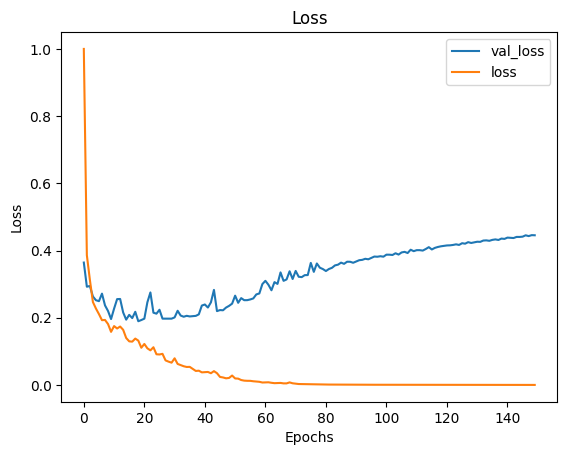

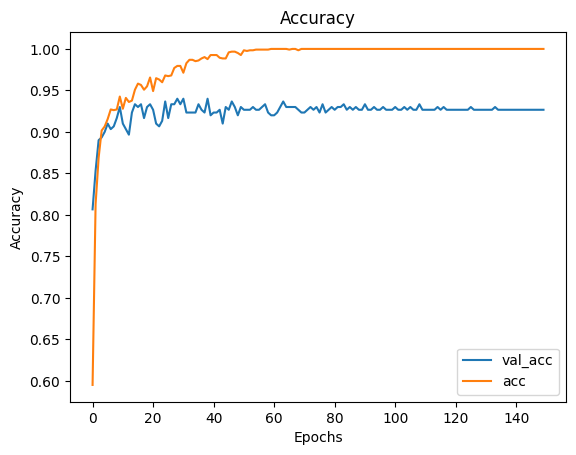

In [12]:
def visualize_training_results(results):
    plt.figure()
    plt.plot(results.history['val_loss'])
    plt.plot(results.history['loss'])
    plt.legend(['val_loss', 'loss'])
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.show()
    
    plt.figure()
    plt.plot(results.history['val_acc'])
    plt.plot(results.history['acc'])
    plt.legend(['val_acc', 'acc'])
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.show()


visualize_training_results(results)

In [13]:
cnn_model = models.Sequential()

cnn_model.add(layers.Conv2D(32 , (3,3) , activation='relu' , input_shape=(64,64,3)))
cnn_model.add(layers.MaxPool2D((2,2)))

cnn_model.add(layers.Conv2D(64 , (4,4) , activation='relu'))
cnn_model.add(layers.MaxPool2D((2,2)))

cnn_model.add(layers.Conv2D(128 , (3,3) , activation='relu'))
cnn_model.add(layers.MaxPool2D((2,2)))

cnn_model.add(layers.Conv2D(256 , (3,3) , activation='relu'))
cnn_model.add(layers.MaxPool2D((2,2)))

cnn_model.add(layers.Flatten())
cnn_model.add(layers.Dense(64, activation='relu'))
cnn_model.add(layers.Dense(1, activation='sigmoid'))

In [14]:
# Compile the model
cnn_model.compile(optimizer=Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['acc'])

In [15]:
results2 = cnn_model.fit(
        train_images,
        train_y,
        epochs = 35,
        batch_size = 256,
        validation_data=(val_images,val_y)
    )

Epoch 1/35
5/5 [==============================] - 4s 831ms/step - loss: 0.5816 - acc: 0.7615 - val_loss: 0.3016 - val_acc: 0.8767
Epoch 2/35
5/5 [==============================] - 4s 851ms/step - loss: 0.2493 - acc: 0.9033 - val_loss: 0.3788 - val_acc: 0.8567
Epoch 3/35
5/5 [==============================] - 5s 1s/step - loss: 0.2458 - acc: 0.9139 - val_loss: 0.2851 - val_acc: 0.8833
Epoch 4/35
5/5 [==============================] - 5s 1s/step - loss: 0.1970 - acc: 0.9213 - val_loss: 0.1696 - val_acc: 0.9400
Epoch 5/35
5/5 [==============================] - 5s 1000ms/step - loss: 0.1454 - acc: 0.9525 - val_loss: 0.1642 - val_acc: 0.9400
Epoch 6/35
5/5 [==============================] - 5s 909ms/step - loss: 0.1170 - acc: 0.9623 - val_loss: 0.1600 - val_acc: 0.9500
Epoch 7/35
5/5 [==============================] - 5s 976ms/step - loss: 0.1107 - acc: 0.9639 - val_loss: 0.1636 - val_acc: 0.9367
Epoch 8/35
5/5 [==============================] - 5s 921ms/step - loss: 0.1089 - acc: 0.9631 - 

In [16]:
acc1 = cnn_model.evaluate(train_images,train_y)
acc2 = cnn_model.evaluate(test_images,test_y)
print((f'Train: {acc1}\nTest: {acc2}'))

12/12 [==============================] - 0s 30ms/step - loss: 0.2767 - acc: 0.9421
Train: [0.017579499632120132, 0.9942622780799866]
Test: [0.27669858932495117, 0.942105233669281]


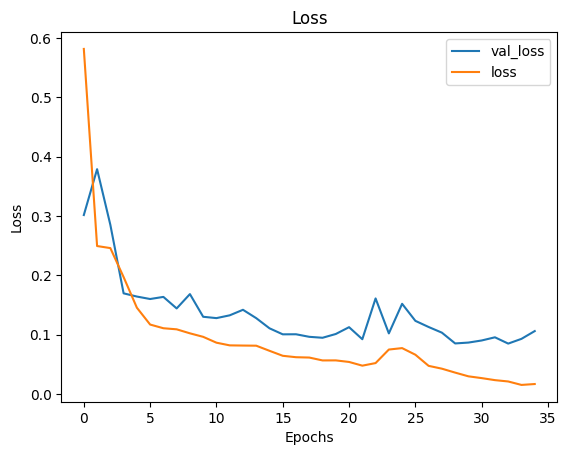

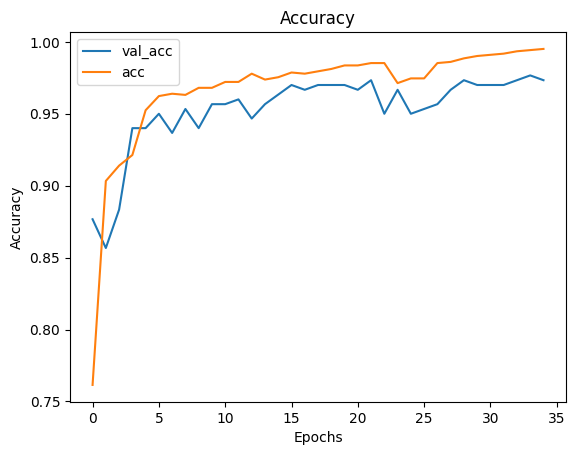

In [17]:
def visualize_training_results(results):
    plt.figure()
    plt.plot(results.history['val_loss'])
    plt.plot(results.history['loss'])
    plt.legend(['val_loss', 'loss'])
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.show()
    
    plt.figure()
    plt.plot(results.history['val_acc'])
    plt.plot(results.history['acc'])
    plt.legend(['val_acc', 'acc'])
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.show()


visualize_training_results(results2)

In [18]:
train_new_gen = ImageDataGenerator(rescale=1./255, 
                                   rotation_range=40, 
                                   width_shift_range=0.2, 
                                   height_shift_range=0.2, 
                                   shear_range=0.3, 
                                   zoom_range=0.1, 
                                   horizontal_flip=False)

train_generator = train_new_gen.flow_from_directory(
    train_folder,
    target_size=(64,64),
    batch_size=1220,
    class_mode = 'binary'
    )

test_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
    test_folder,
    target_size=(64,64),
    batch_size=380,
    class_mode = 'binary'
)

val_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
    val_folder,
    target_size=(64,64),
    batch_size=300,
    class_mode = 'binary'
)

Found 1220 images belonging to 2 classes.
Found 380 images belonging to 2 classes.
Found 300 images belonging to 2 classes.


In [19]:
aug = models.Sequential()
aug.add(layers.Conv2D(32 , (3,3) , activation='relu' , input_shape=(64,64,3)))
aug.add(layers.MaxPool2D((2,2)))

aug.add(layers.Conv2D(64 , (4,4) , activation='relu'))
aug.add(layers.MaxPool2D((2,2)))

aug.add(layers.Conv2D(128 , (3,3) , activation='relu'))
aug.add(layers.MaxPool2D((2,2)))

aug.add(layers.Conv2D(256 , (3,3) , activation='relu'))
aug.add(layers.MaxPool2D((2,2)))

aug.add(layers.Flatten())
aug.add(layers.Dense(64, activation='relu'))
aug.add(layers.Dense(1, activation='sigmoid'))

In [20]:
aug.compile(optimizer='sgd',loss='binary_crossentropy',metrics=['acc'])

In [21]:
aug.fit(
    train_generator,
    epochs=30,
    validation_data = val_generator
)

Epoch 1/30
1/1 [==============================] - 22s 22s/step - loss: 0.6958 - acc: 0.3418 - val_loss: 0.6947 - val_acc: 0.4033
Epoch 2/30
1/1 [==============================] - 4s 4s/step - loss: 0.6948 - acc: 0.3828 - val_loss: 0.6938 - val_acc: 0.4567
Epoch 3/30
1/1 [==============================] - 1s 750ms/step - loss: 0.6942 - acc: 0.4492 - val_loss: 0.6930 - val_acc: 0.5033
Epoch 4/30
1/1 [==============================] - 1s 875ms/step - loss: 0.6933 - acc: 0.5025 - val_loss: 0.6922 - val_acc: 0.5300
Epoch 5/30
1/1 [==============================] - 1s 684ms/step - loss: 0.6926 - acc: 0.5221 - val_loss: 0.6914 - val_acc: 0.5500
Epoch 6/30
1/1 [==============================] - 1s 703ms/step - loss: 0.6922 - acc: 0.5590 - val_loss: 0.6906 - val_acc: 0.5633
Epoch 7/30
1/1 [==============================] - 1s 703ms/step - loss: 0.6912 - acc: 0.5910 - val_loss: 0.6898 - val_acc: 0.5800
Epoch 8/30
1/1 [==============================] - 1s 764ms/step - loss: 0.6904 - acc: 0.6107 -

In [22]:
acc1 = aug.evaluate(train_generator)
acc2 = aug.evaluate(test_generator)
print((f'Train: {acc1}\nTest: {acc2}'))

1/1 [==============================] - 0s 0s/step - loss: 0.6741 - acc: 0.7158
Train: [0.672831118106842, 0.7450819611549377]
Test: [0.6740990877151489, 0.7157894968986511]


#### Out of the three Models , the results of the cnn_model without augmentation are promising, indicating that the model has learned meaningful patterns from the training data and can make accurate predictions on new instances.


In [23]:
# Saving the model
cnn_model.save('dep_model.h5')
print("Model saved successfully!")

Model saved successfully!


In [25]:
cnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 64)        32832     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 128)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 4, 4, 256)        

In [26]:
aug.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 28, 28, 64)        32832     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 12, 12, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 6, 6, 128)         0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 4, 4, 256)        

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 150)               1843350   
_________________________________________________________________
dense_1 (Dense)              (None, 100)               15100     
_________________________________________________________________
dense_2 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 51        
Total params: 1,863,551
Trainable params: 1,863,551
Non-trainable params: 0
_________________________________________________________________
